In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import mpl
# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']
# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False
# 显示所有列
pd.set_option('display.max_columns', None)
# 显示所有行
pd.set_option('display.max_rows', None)

In [2]:
DATA_PATH = "附件一：325个样本数据.xlsx"

df = pd.read_excel(DATA_PATH)
# show the shape of data
df.shape


# then drop the missing value
df = df.dropna(how = 'any')

df.shape

(325, 367)

In [3]:
import pandas as pd
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split

#将数据划分为标签和特征
X = df.drop(['辛烷值RON'],axis = 1)
X = X.iloc[:,0:35]
y = df['辛烷值RON']

In [4]:
# 分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X.values,y.values,test_size=0.3)


In [5]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error 

'''
# 4.空值处理，默认方法：使用特征列的平均值进行填充
my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)
'''
# 5.调用LightGBM模型，使用训练集数据进行训练（拟合）
# Add verbosity=2 to print messages while running boosting
my_model = lgb.LGBMRegressor(objective='regression', num_leaves=31, learning_rate=0.05, n_estimators=50,
                             verbosity=2)
my_model.fit(Xtrain, Ytrain, verbose=False)

# 6.使用模型对测试集数据进行预测
predictions = my_model.predict(Xtest)

# 7.对模型的预测结果进行评判（平均绝对误差）
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, Ytest)))


[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.012587
[LightGBM] [Debug] init for col-wise cost 0.000005 seconds, init for row-wise cost 0.000453 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2412
[LightGBM] [Info] Number of data points in the train set: 227, number of used features: 35
[LightGBM] [Info] Start training from score 88.408282
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and depth = 4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and depth = 4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 9 and depth = 4
[LightGBM] [Warning] No further splits with positive gain, bes

D:\DevelopmentTool\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


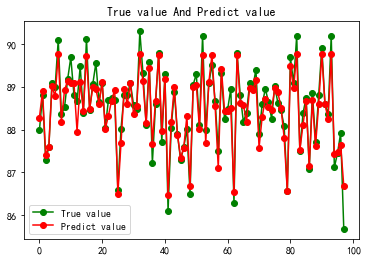

In [6]:
plt.figure()
plt.plot(np.arange(98), Ytest, "go-", label="True value")
plt.plot(np.arange(98), predictions, "ro-", label="Predict value")
plt.title("True value And Predict value")
plt.legend()

In [7]:
from sklearn import metrics
score = my_model.score(Xtest, Ytest)
print('LightGBMRegressor得分： ', score)
print('Mean Absolute Error:', metrics.mean_absolute_error(Ytest, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Ytest, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Ytest, predictions)))

LightGBMRegressor得分：  0.9195647330536274
Mean Absolute Error: 0.20098175814579625
Mean Squared Error: 0.07062459988241643
Root Mean Squared Error: 0.26575289251937867
